### Importing the libraries and loading the data

In [1]:
# Importing the libraries that are needed in this assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [2]:
ld= pd.read_csv('Leads.csv')

In [3]:
ld.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
ld.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


###  Lets check for the missing values and handle them accordingly 

In [6]:
#lets find the missing values and duplicate rows now

missing_values=ld.isnull().sum()

duplicated=ld.duplicated().sum()

In [7]:
print("Number of missing values\n",missing_values)
print("Number of duplicated rows\n",duplicated)

Number of missing values
 Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Ne

In [8]:
# Since Lead Quality is an important column, we can take care of its missing values with 'Unknown'

ld['Lead Quality'].fillna('Unknown', inplace=True)

In [9]:
# In my opinion, to replace the missing values in the categorical columns, we can use mode

ld['Lead Source'].fillna(ld['Lead Source'].mode()[0], inplace=True)
ld['Last Activity'].fillna(ld['Last Activity'].mode()[0], inplace=True)

In [10]:
# And for the missing values in the numerical columns, we can use median

ld['TotalVisits'].fillna(ld['TotalVisits'].median(),inplace=True)
ld['Page Views Per Visit'].fillna(ld['Page Views Per Visit'].median(),inplace=True)

In [11]:
# We can drop the Asymmetrique columns as they have way too many missing rows

ld.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1, inplace= True)

In [12]:
# Moreover using the Data Dictionary we can drop the unncessary columns

ld.drop(['Prospect ID','Lead Number','Country','Search','Magazine','Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content', 'City'],axis=1,inplace=True)

In [13]:
### For the remaining columns, lets proceed to take care of the missing values

ld['Specialization'].fillna('Select Specialization', inplace=True)
ld['How did you hear about X Education'].fillna('Unknown', inplace=True)
ld['What is your current occupation'].fillna('Unknown', inplace=True)
ld['What matters most to you in choosing a course'].fillna('Unknown', inplace=True)
ld['Lead Profile'].fillna('Unknown', inplace=True)

In [14]:
ld.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course       0
Tags                                             3353
Lead Quality                                        0
Lead Profile                                        0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Last Notable Activity       

In [15]:
# We can also drop Tags as it has way too many missing values and i dont think it is a good idea to give false leads in any way

ld.drop('Tags', axis = 1, inplace = True)

In [16]:
# Lets make sure there are no missing values moving forward

ld.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Lead Quality                                     0
Lead Profile                                     0
I agree to pay the amount through cheque         0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

### We can convert the categorical variables to dummy variables

In [17]:
# Lets create dummy variables for the categorical columns and drop the first category to avoid multicollinearity 

ld = pd.get_dummies(ld, columns=['Lead Origin', 'Lead Source', 'Last Activity', 
                                 'Specialization','How did you hear about X Education', 
                                 'What is your current occupation', 'What matters most to you in choosing a course', 
                                 'Lead Profile', 'Lead Quality'], drop_first=True)

In [18]:
# We need to scale certain features to make sure that they contribute fairly to the logistic reg model

scaler = StandardScaler()

continuous_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

ld[continuous_vars] = scaler.fit_transform(ld[continuous_vars])

###  Feature and Target sepration

In [19]:
# We can seperate the target variable from all the other columns

X= ld.drop(columns='Converted')
y=ld['Converted']

###  Train Test Splits and encoding

In [20]:
# Lets proceed to split the data into training(70%) and testing(30%) sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [21]:
# We also need to ensure that the training and testing sets have the same dummy variables

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

In [22]:
# Now we can align the training and testing sets columns

X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

### Logistic Regression Model

In [23]:
# We can do the logistic regression model now

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=1000)

In [24]:
y_pred = logreg.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [25]:
# The evaluation metrics can be observed

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.851010101010101
Precision: 0.8219735503560529
Recall: 0.7724665391969407
F1 Score: 0.7964514539181863


In [26]:
# We can also find the confusion matrix easily since we have X_test and y_pred

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[1551  175]
 [ 238  808]]


In [27]:
# Classification report can be insightful 

print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1726
           1       0.82      0.77      0.80      1046

    accuracy                           0.85      2772
   macro avg       0.84      0.84      0.84      2772
weighted avg       0.85      0.85      0.85      2772



In [28]:
# Predicting probabilities for ROC AUC score

y_pred_proba = logreg.predict_proba(X_test_encoded)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.9264122663393516


###  Visualizations

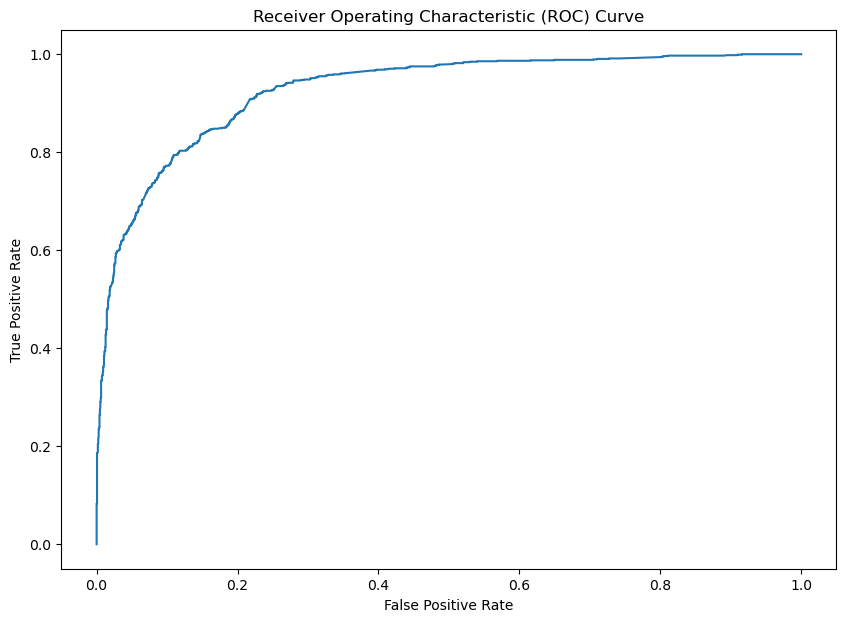

In [29]:
# Plotting the ROC curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

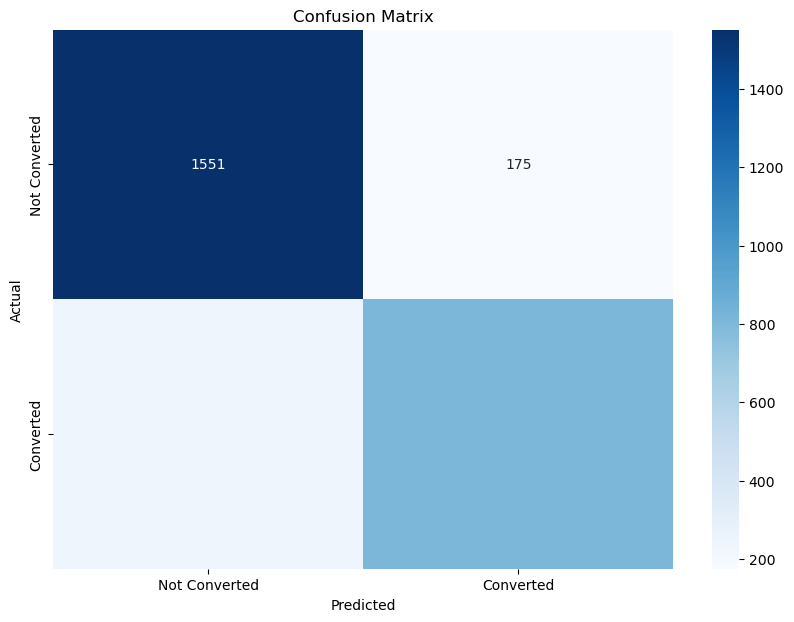

In [30]:
# Heatmap for confusion matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

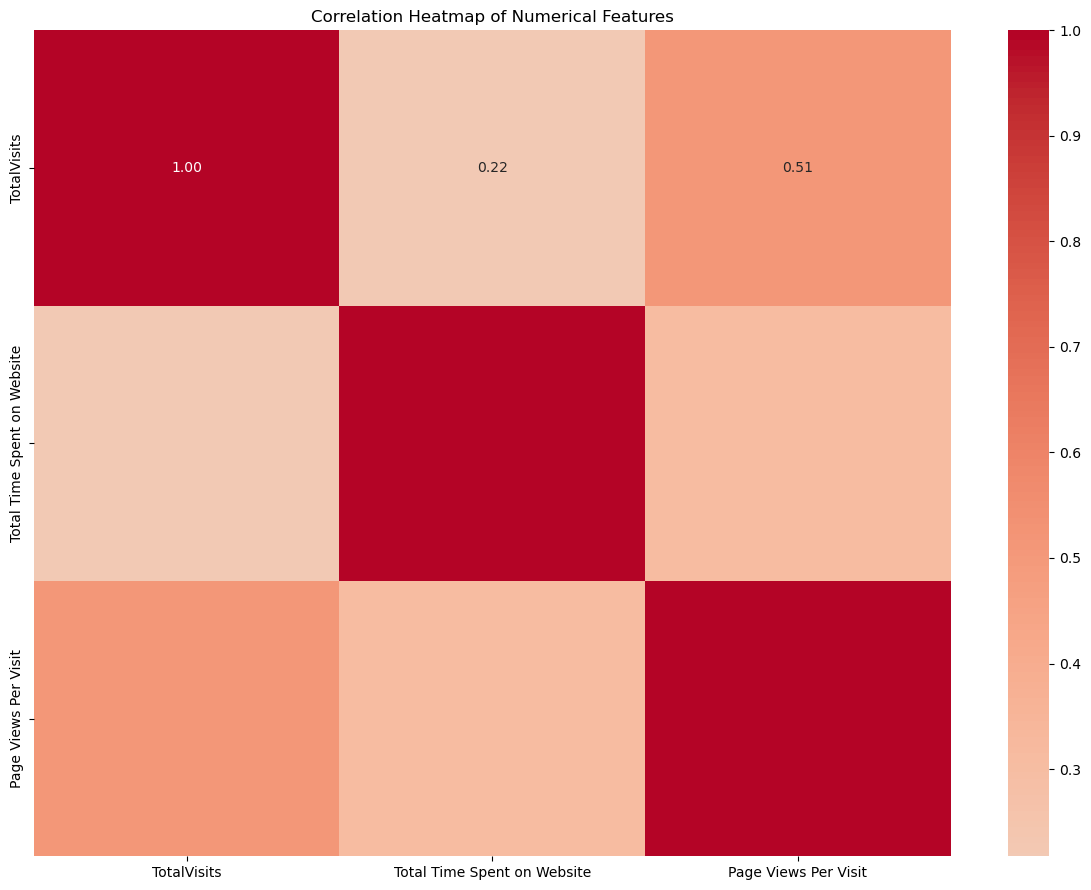

In [31]:
plt.figure(figsize=(12, 9)) 
corr_matrix = ld[continuous_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f") 
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout() 
plt.show()